In [1]:
import numpy as np
import re 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
from utils import read_ising_file

# Análisis de Distribuciones del Modelo Ising

Este notebook analiza las distribuciones de energía y magnetización para diferentes temperaturas.



In [2]:
# Filtrar temperaturas desde objective_files y seleccionar archivos objetivo
temps = []
n = 10 # Tamaño de la red
folder = f'./data/data_{n}/'


T = ['0.700', '1.000', '1.700', '2.000', '2.300', '3.000', '3.500', '4.000'] # Temperaturas objetivo
patron = re.compile(r"_T([0-9.]+)_")  # Patrón para extraer temperaturas desde el filename

# Extraer archivos 
objective_files = []
for file in os.listdir(folder):
    match = patron.search(file)

    if match:
        # Extraer temperatura desde el filename
        temp_match = f"{float(match.group(1)):.3f}"
        temps.append(temp_match)

        # Agregar objective_files para temperaturas objetivo
        if temp_match in T and file not in objective_files:
            objective_files.append(file)



## Red de espines


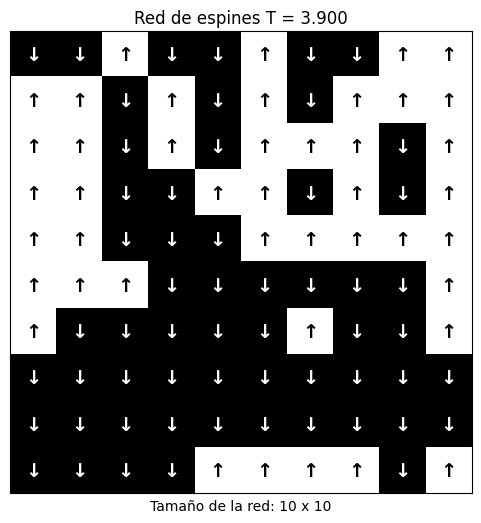

In [3]:
read_ising_file('./data/data_10/ising_L10_T3.900_1.txt').plot_spin(103, spin_arrows=True)

## Distribución de Energía



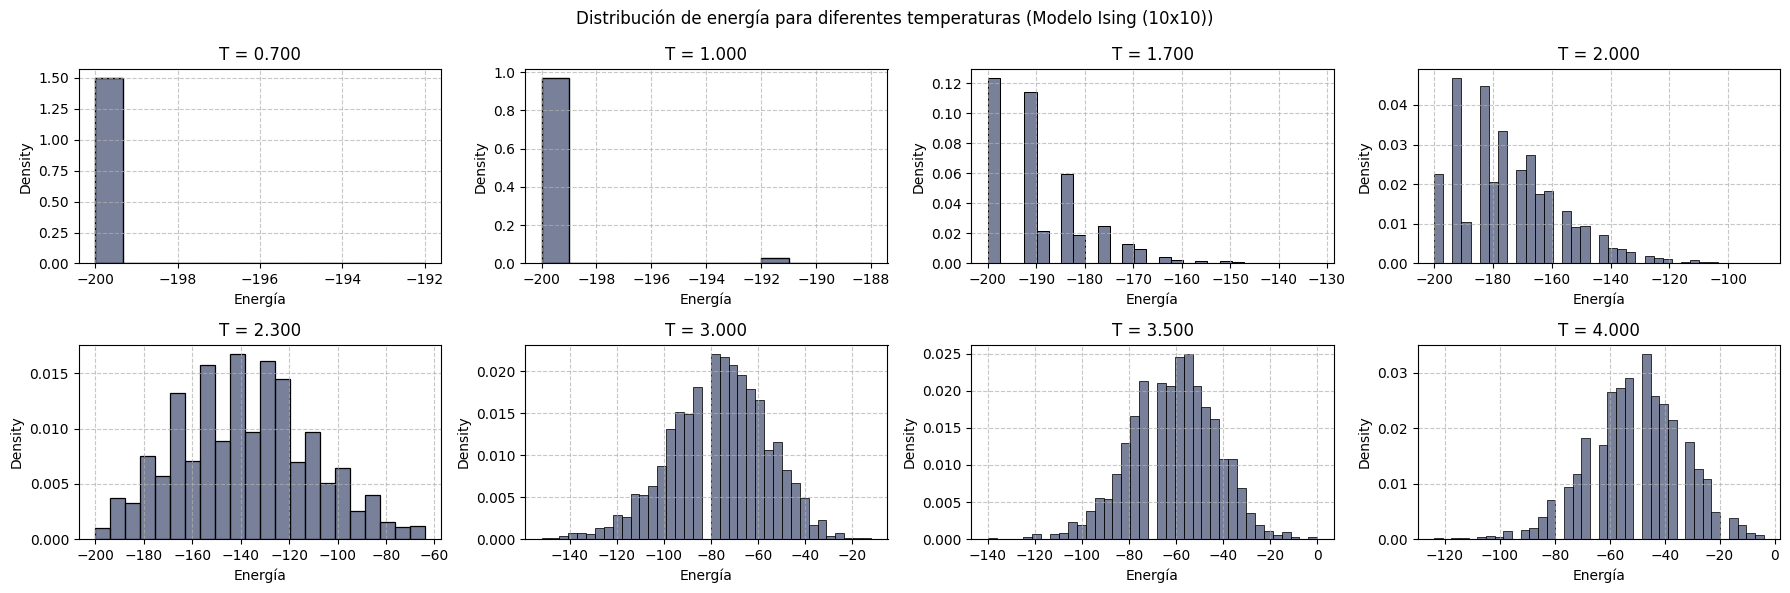

In [4]:
# Crear la figura y la grilla 
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(2, 4)

for i in range(8):
    ax = fig.add_subplot(gs[i])

    # Read file and calculate energy distribution (optimizado: carga todos los datos una vez)
    file = objective_files[i]
    ising = read_ising_file(folder + file)
    all_spins = ising.load_all_spins(invert=False)  # Cargar todos los espines una vez
    energy = [read_ising_file.calculate_energy(spin, ising.metadata) for spin in all_spins]

    sns.histplot(energy, ax=ax, color="#3f4b6f", alpha=0.7, stat="density")
    ax.set_title(f"T = {T[i]}")
    ax.set_xlabel('Energía')
    ax.grid(True, linestyle="--", alpha=0.7)

fig.suptitle(f"Distribución de energía para diferentes temperaturas (Modelo Ising ({n}x{n}))")

plt.tight_layout()
plt.savefig(f'img_results/ising_energy_distribution_{n}.png', dpi=300, bbox_inches='tight')
plt.show()



## Distribución de Magnetización



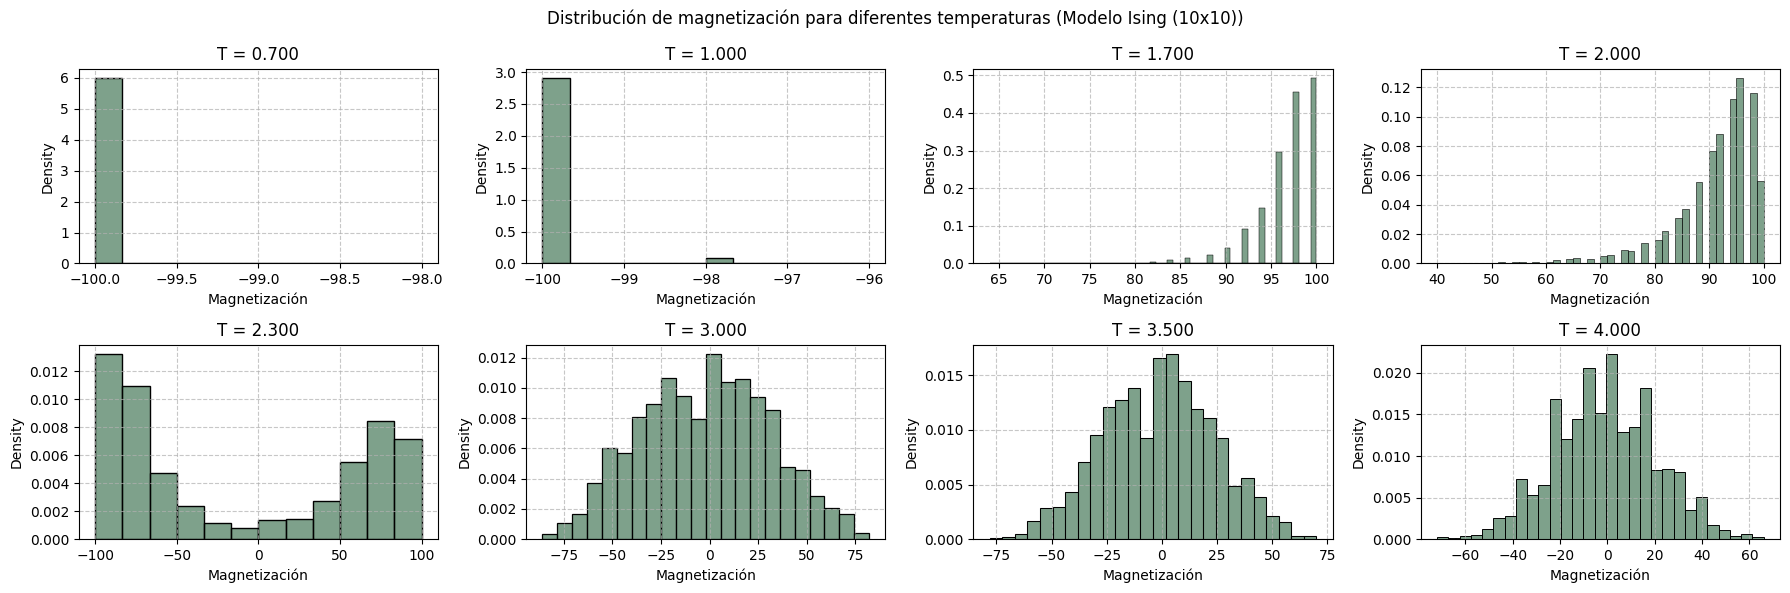

In [5]:
# Crear la figura y la grilla 
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(2, 4)

for i in range(8):
    ax = fig.add_subplot(gs[i])
    
    file = objective_files[i]
    ising = read_ising_file(folder + file)
    all_spins = ising.load_all_spins(invert=False)  # Cargar todos los espines una vez
    magnetization = [read_ising_file.calculate_magnetization(spin) for spin in all_spins]

    sns.histplot(magnetization, ax=ax, color="#47795a", alpha=0.7, stat="density")
    ax.set_title(f"T = {T[i]}")
    ax.set_xlabel('Magnetización')
    ax.grid(True, linestyle="--", alpha=0.7)

fig.suptitle(f"Distribución de magnetización para diferentes temperaturas (Modelo Ising ({n}x{n}))")

plt.tight_layout()
plt.savefig(f'img_results/ising_magnetization_distribution_{n}.png', dpi=300, bbox_inches='tight')
plt.show()



## Magnetización Promedio vs Temperatura

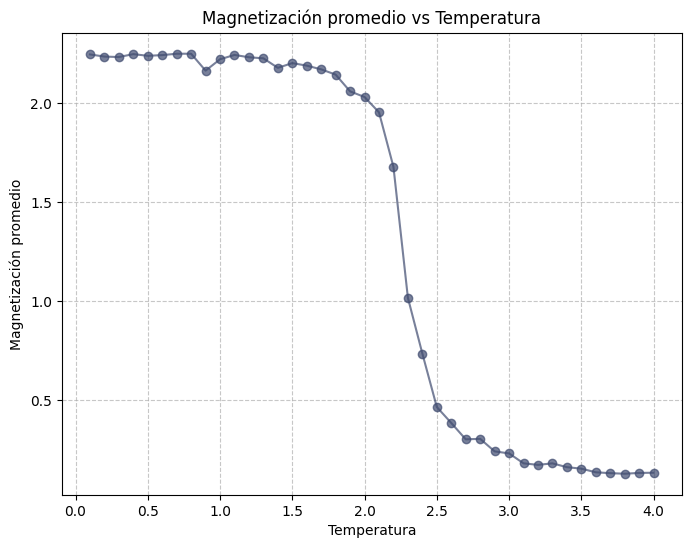

In [ ]:
T = np.array(temps, dtype=float)
folder = './data/data_20/'
M_mean = []
n = 20
num_spins = n * n  # Número total de espines en la red

for file in os.listdir(folder):
    try:
        ising = read_ising_file(folder + file)
        all_spins = ising.load_all_spins(invert=False)  # Cargar todos los espines una vez
        magnetization = [read_ising_file.calculate_magnetization(spin) for spin in all_spins]
        # La magnetización por espín ya se normaliza de esta forma y su valor máximo será 1
        mean_m_per_spin = np.mean(np.abs(magnetization)) / num_spins
        M_mean.append(mean_m_per_spin)
    except (ValueError, KeyError, IndexError):
        # Ignorar archivos que no son válidos
        continue

M_mean = np.array(M_mean)  # Ya es positiva por el abs de arriba, no aplicar np.abs aquí

plt.figure(figsize=(8, 6))
plt.plot(T, M_mean, marker='o', linestyle='-', color="#3f4b6f", alpha=0.7)
plt.grid(True, linestyle="--", alpha=0.7)

plt.xlabel('Temperatura')
plt.ylabel('Magnetización promedio')
plt.title('Magnetización promedio vs Temperatura')
plt.savefig(f'img_results/ising_magnetization_vs_temperature_{n}.png', dpi=300, bbox_inches='tight')
plt.show()

